In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# path = 'https://raw.githubusercontent.com/pehls/gp27_techchallenge_2/master/data/raw/dados_ibovespa.csv'
df = pd.read_csv('../data/raw/dados_ibovespa.csv', decimal=',', thousands='.', parse_dates=[0])
df.sort_values('Data', inplace=True)
df.set_index('Data', inplace=True)
df.head()

<ipython-input-3-79f0e1b3143d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(path, decimal=',', thousands='.', parse_dates=[0])


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2000-12-27,15186,14805,15223,14805,"239,98M","2,65%"
2000-12-28,15259,15188,15269,15132,"324,26M","0,48%"
2001-01-02,17039,17670,17673,16977,"319,39M","-3,59%"
2001-01-03,16417,15891,16439,15875,"153,37M","3,30%"
2001-01-06,14792,14654,14792,14409,"215,98M","0,97%"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5589 entries, 2000-12-27 to 2023-12-07
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Último    5589 non-null   int64 
 1   Abertura  5589 non-null   int64 
 2   Máxima    5589 non-null   int64 
 3   Mínima    5589 non-null   int64 
 4   Vol.      5588 non-null   object
 5   Var%      5589 non-null   object
dtypes: int64(4), object(2)
memory usage: 305.6+ KB


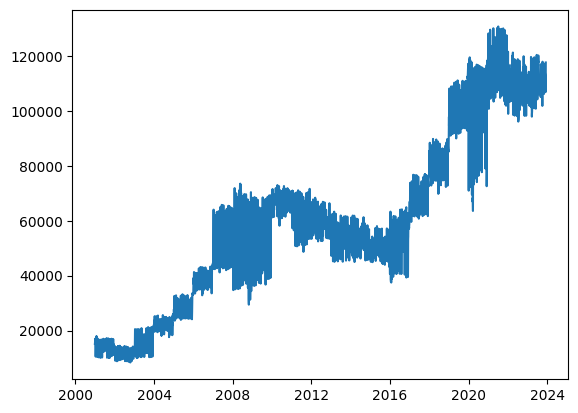

In [5]:
plt.plot(df.index, df['Último'])
plt.show()

In [6]:
df_ts = pd.DataFrame(df['Último'].to_list(), columns=['close'], index=df.index)
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5589 entries, 2000-12-27 to 2023-12-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   close   5589 non-null   int64
dtypes: int64(1)
memory usage: 87.3 KB


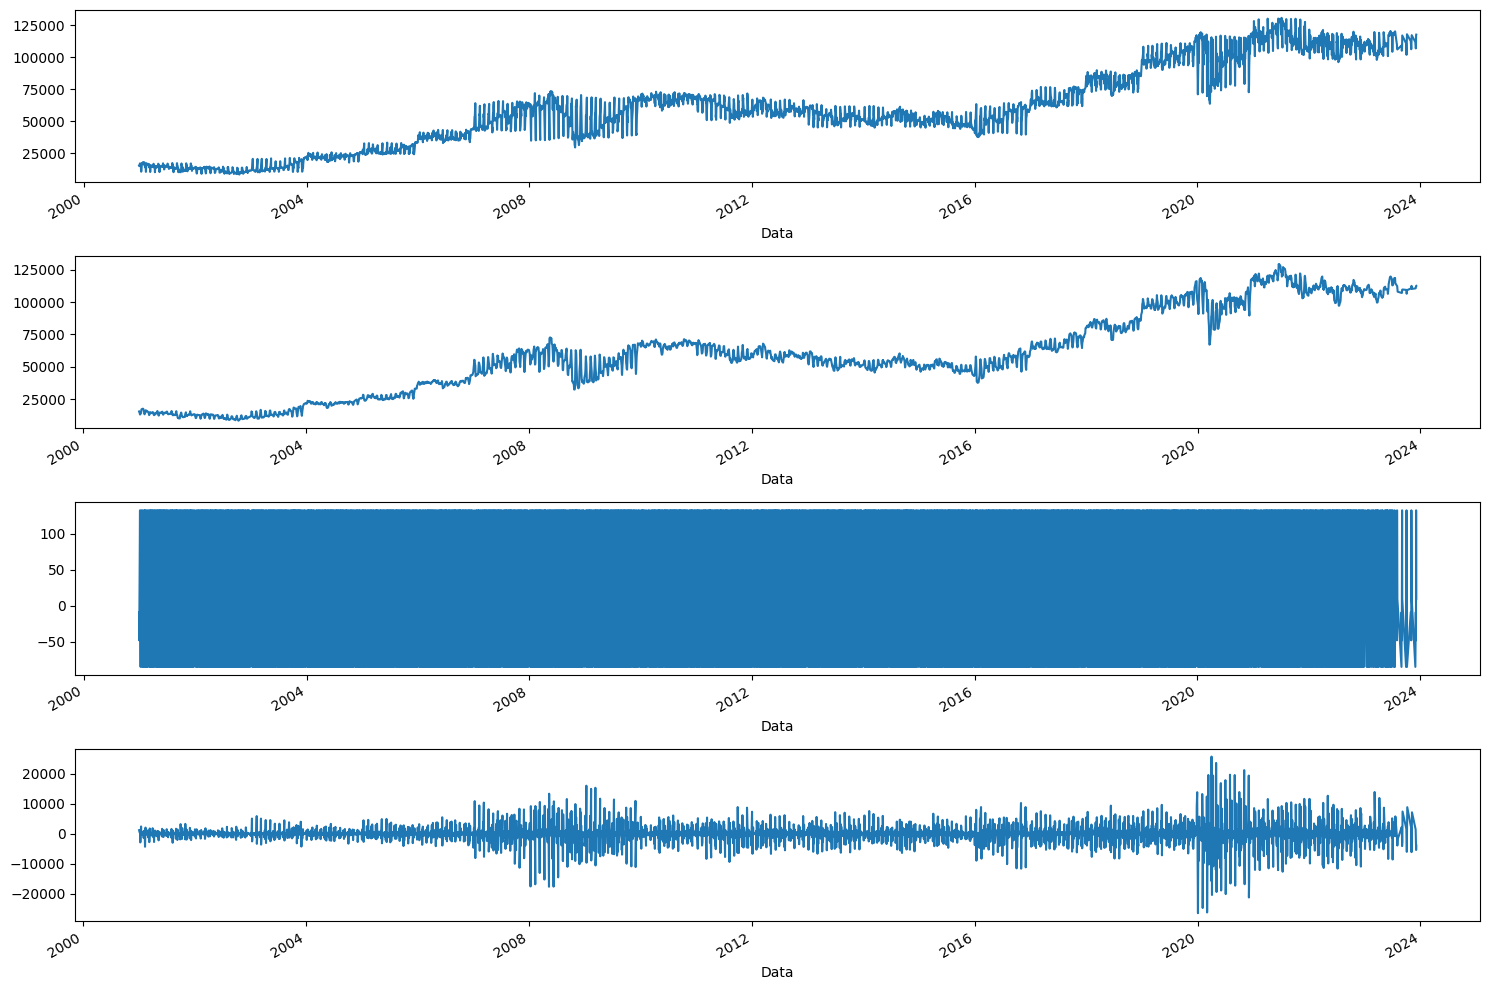

In [7]:
# decompor sazonalidade
decomp = seasonal_decompose(df_ts, period=5)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
decomp.observed.plot(ax=ax1)
decomp.trend.plot(ax=ax2)
decomp.seasonal.plot(ax=ax3)
decomp.resid.plot(ax=ax4)

plt.tight_layout()

In [8]:
sns.set_style('darkgrid')

In [9]:
def print_adf(serie):
  result = adfuller(serie)

  print('Teste ADF')
  print(f'Teste Estatístico: {result[0]}')
  print(f'P-value: {result[1]}')
  print('Valores críticos:')

  for k, v in result[4].items():
    print(f'\t{k}: {v}')

Teste ADF
Teste Estatístico: -0.5435476542576514
P-value: 0.8832347018013083
Valores críticos:
	1%: -3.431525618853028
	5%: -2.8620595080178783
	10%: -2.5670465327514655


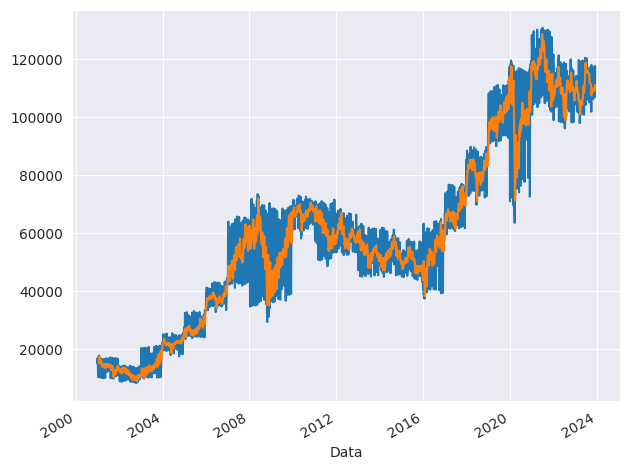

In [10]:
ma = df_ts.rolling(12).mean()

fig, ax = plt.subplots()
df_ts.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False)
plt.tight_layout()

print_adf(df_ts.close.values)

Teste ADF
Teste Estatístico: -1.183192537155301
P-value: 0.6807837495941716
Valores críticos:
	1%: -3.431525618853028
	5%: -2.8620595080178783
	10%: -2.5670465327514655


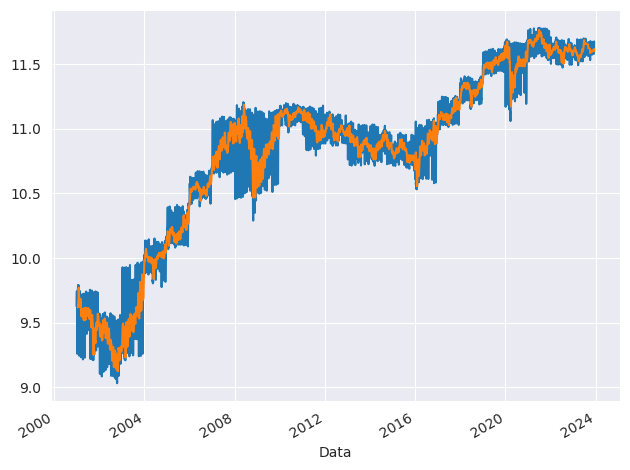

In [11]:
df_log = np.log(df_ts)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False)
plt.tight_layout()

print_adf(df_log.close.values)

Teste ADF
Teste Estatístico: -12.884788011990251
P-value: 4.578351723641324e-24
Valores críticos:
	1%: -3.4315296482633255
	5%: -2.862061288268099
	10%: -2.5670474804347574


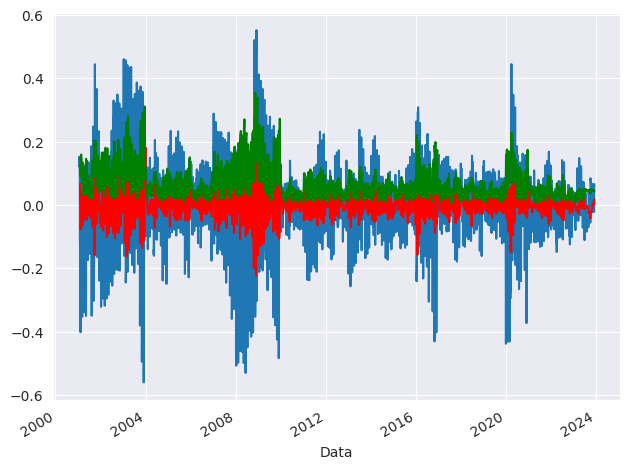

In [12]:
df_s = (df_log - ma_log).dropna()
ma_s = df_s.rolling(12).mean()
std_s = df_s.rolling(12).std()

fig, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std_s.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

print_adf(df_s)

Teste ADF
Teste Estatístico: -23.57662506079499
P-value: 0.0
Valores críticos:
	1%: -3.431525618853028
	5%: -2.8620595080178783
	10%: -2.5670465327514655


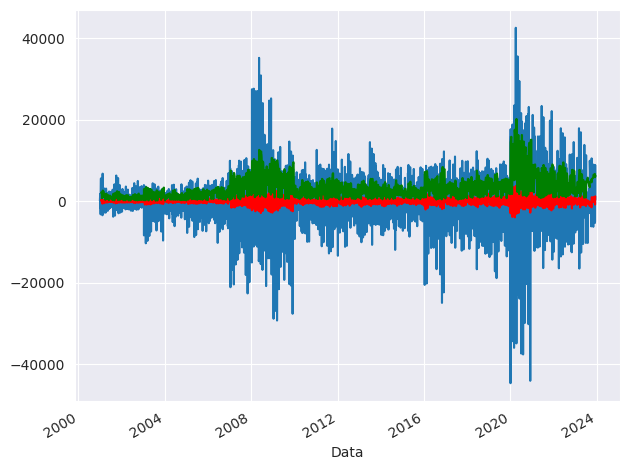

In [13]:
df_diff = df_ts.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

fig, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

print_adf(df_diff.dropna())

Teste ADF
Teste Estatístico: -26.406733902647552
P-value: 0.0
Valores críticos:
	1%: -3.431530074019146
	5%: -2.862061476372876
	10%: -2.567047580568882


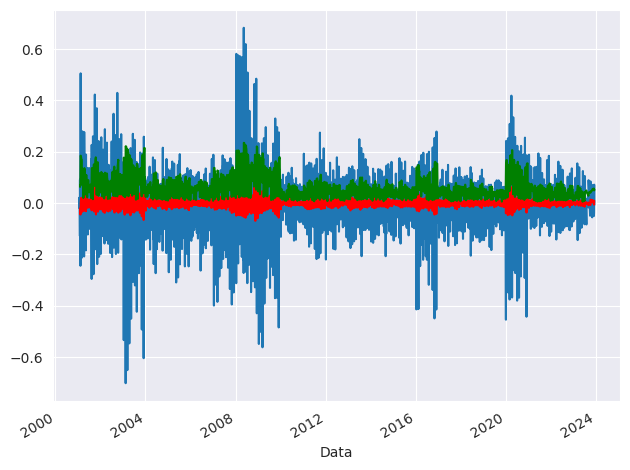

In [14]:
df_diff2 = df_s.diff(1)
ma_diff2 = df_diff2.rolling(12).mean()
std_diff2 = df_diff2.rolling(12).std()

fig, ax = plt.subplots()
df_diff2.plot(ax=ax, legend=False)
ma_diff2.plot(ax=ax, legend=False, color='r')
std_diff2.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

print_adf(df_diff2.dropna())

In [15]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 7.4 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.6-py3-none-any.whl size=158045 sha256=e83e66d9e5ac5ae06fa3f5a791d6513e4b17c7dc39486613e2506e20f6e0c981
  Stored in directory: /root/.cache/pip/wheels/c8/54/a1/b294b8b33c6107946b5720b3acb1fce07b97bbbc9677a501ce
Successfully built fugue-sql-antlr


In [29]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, SeasonalNaive, SeasonalWindowAverage

In [17]:
def wmape(y_true, y_pred):
  return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [18]:
df = df_ts
df = df.rename(columns={'close': 'y'})
df['ds'] = df.index.to_list()
df['unique_id'] = 'IBOV'

date_limit = '2023-01-01'
train = df.loc[df.index < date_limit]
test = df.loc[df.index >= date_limit]
h = test.index.nunique()

WMAPE: 4.46%


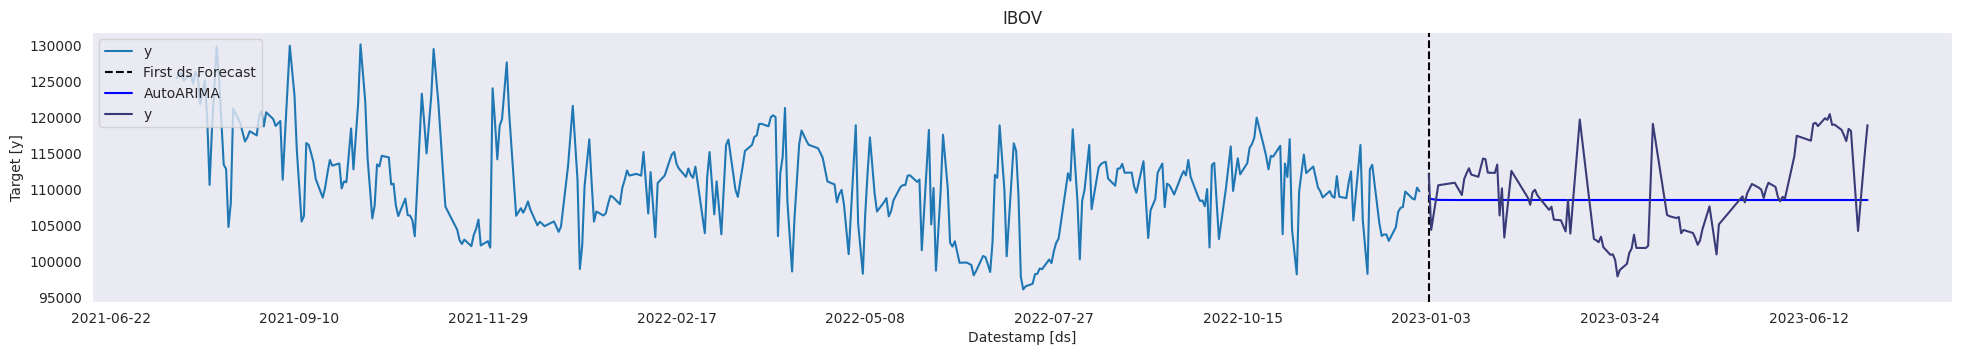

In [26]:
model = StatsForecast(models=[AutoARIMA(season_length=5)], freq='D', n_jobs=-1)
model.fit(train)

forecast = model.predict(h=h)
forecast = forecast.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast.dropna(inplace=True)

res = wmape(forecast['y'].values, forecast['AutoARIMA'].values)
print(f'WMAPE: {res:.2%}')

model.plot(train, forecast, unique_ids=['IBOV'], engine='matplotlib', max_insample_length=365)

WMAPE: 4.43%


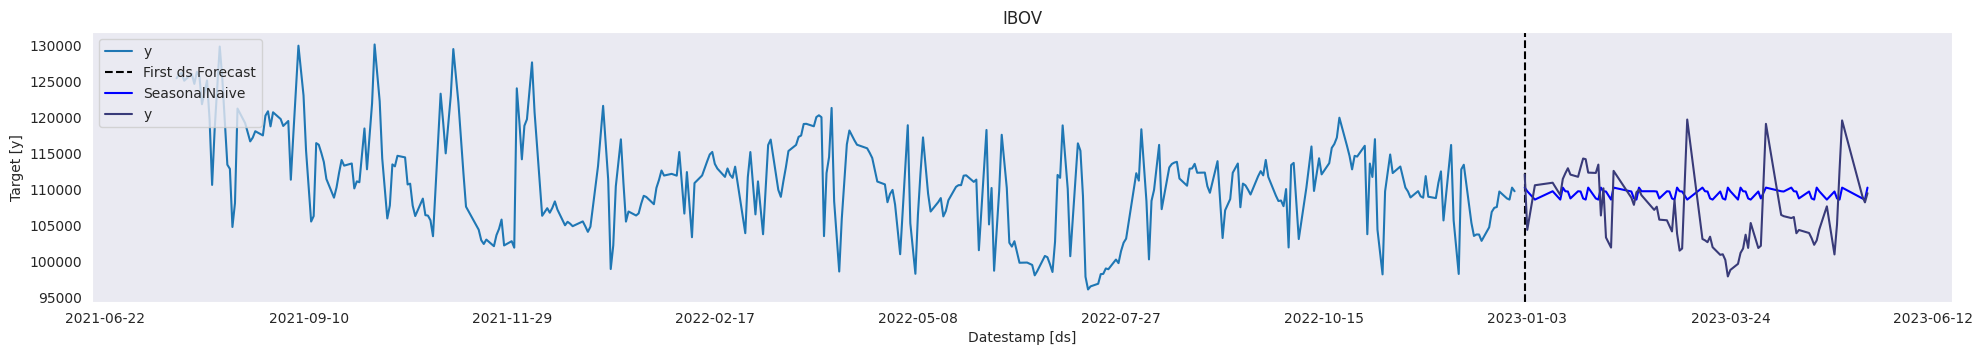

In [30]:
model = StatsForecast(models=[SeasonalNaive(season_length=5)], freq='D', n_jobs=-1)
model.fit(train)

forecast = model.predict(h=h)
forecast = forecast.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast.dropna(inplace=True)

res = wmape(forecast['y'].values, forecast['SeasonalNaive'].values)
print(f'WMAPE: {res:.2%}')

model.plot(train, forecast, unique_ids=['IBOV'], engine='matplotlib', max_insample_length=365)

WMAPE: 3.86%


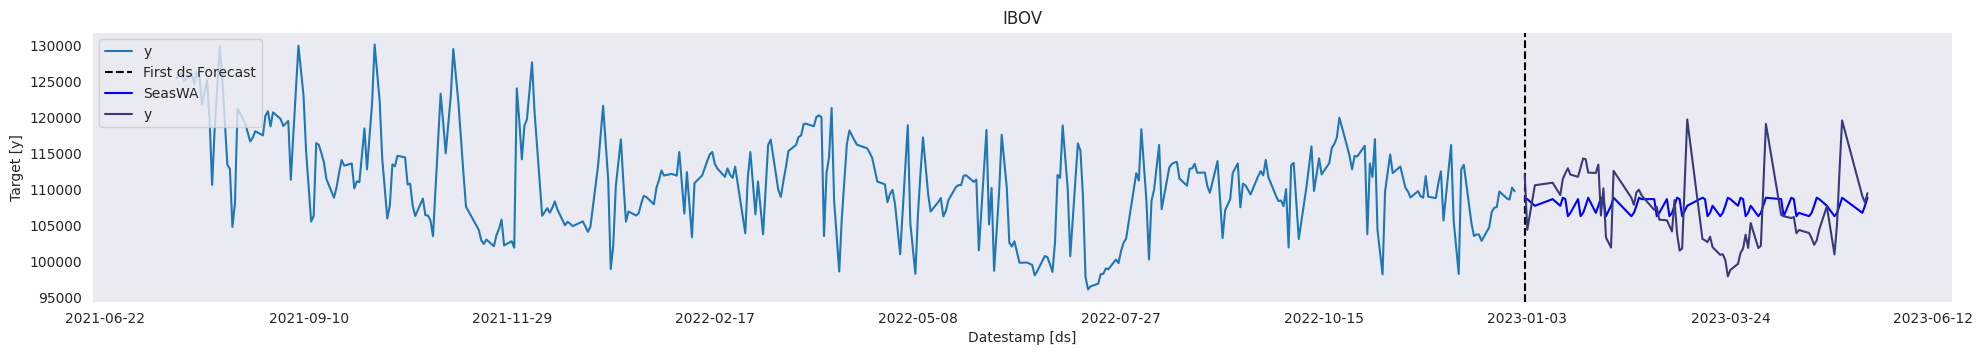

In [36]:
model = StatsForecast(models=[SeasonalWindowAverage(season_length=5, window_size=2)], freq='D', n_jobs=-1)
model.fit(train)

forecast = model.predict(h=h)
forecast = forecast.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast.dropna(inplace=True)

res = wmape(forecast['y'].values, forecast['SeasWA'].values)
print(f'WMAPE: {res:.2%}')

model.plot(train, forecast, unique_ids=['IBOV'], engine='matplotlib', max_insample_length=365)

In [37]:
forecast

,unique_id,ds,SeasWA,y
3,IBOV,2023-01-02,108835.0,112074.0
4,IBOV,2023-01-03,108643.5,104385.0
7,IBOV,2023-01-06,107721.0,110565.0
14,IBOV,2023-01-13,108643.5,110916.0
17,IBOV,2023-01-16,107721.0,109213.0
...,...,...,...,...
127,IBOV,2023-05-06,107721.0,112696.0
128,IBOV,2023-05-07,108835.0,119549.0
136,IBOV,2023-05-15,106739.0,109029.0
137,IBOV,2023-05-16,107721.0,108194.0


In [28]:
pd.date_range('2023-08-01', periods=20, freq='BM')

DatetimeIndex(['2023-08-31', '2023-09-29', '2023-10-31', '2023-11-30',
               '2023-12-29', '2024-01-31', '2024-02-29', '2024-03-29',
               '2024-04-30', '2024-05-31', '2024-06-28', '2024-07-31',
               '2024-08-30', '2024-09-30', '2024-10-31', '2024-11-29',
               '2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', freq='BM')

In [27]:
forecast

,unique_id,ds,AutoARIMA,y
1,IBOV,2023-01-02,108801.109375,112074.0
2,IBOV,2023-01-03,108653.195312,104385.0
5,IBOV,2023-01-06,108535.046875,110565.0
10,IBOV,2023-01-13,108521.531250,110916.0
11,IBOV,2023-01-16,108521.359375,109213.0
...,...,...,...,...
129,IBOV,2023-06-29,108521.210938,118383.0
130,IBOV,2023-06-30,108521.210938,118087.0
131,IBOV,2023-07-03,108521.210938,104228.0
134,IBOV,2023-07-06,108521.210938,115488.0
